<a href="https://colab.research.google.com/github/ghanalk1/Medical-Insurance-Cost/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Insurance Cost Prediction.**

## Columns:
* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance (dependent variable)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Step 1. Importing Dataset**

In [2]:
file_path = '/content/drive/MyDrive/dat/insurance.csv'
df = pd.read_csv(file_path)

In [3]:
# reading dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.shape

(1338, 7)

# **Step 2. EDA**

## **Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5845408090>,
      dtype=object)

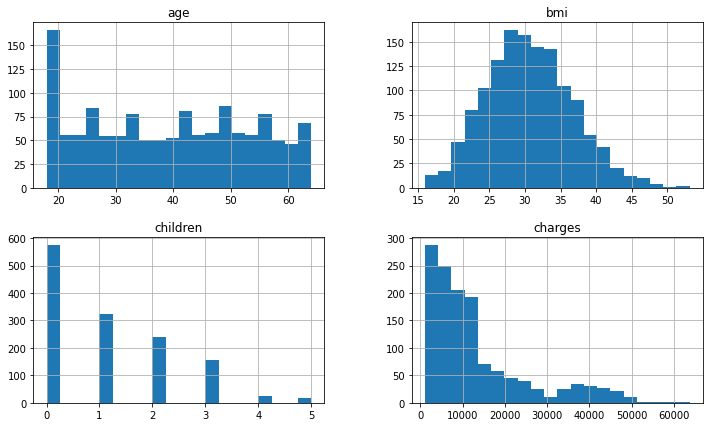

In [7]:
# features
df.hist(figsize=[12,7], bins=20)

## **Multivariate Analysis**

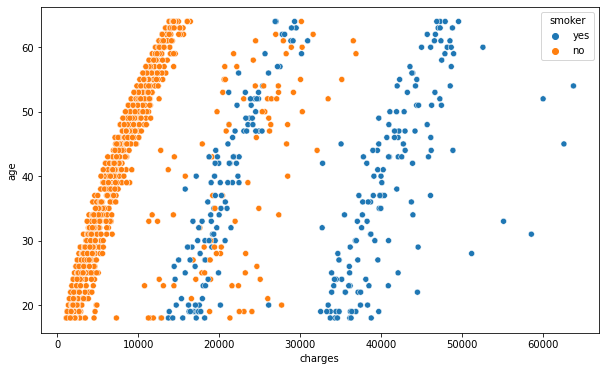

In [8]:
# variation in charges with age
plt.figure(figsize=[10,6])
sns.scatterplot(data=df, x='charges', y='age', hue='smoker')

<Figure size 720x432 with 0 Axes>

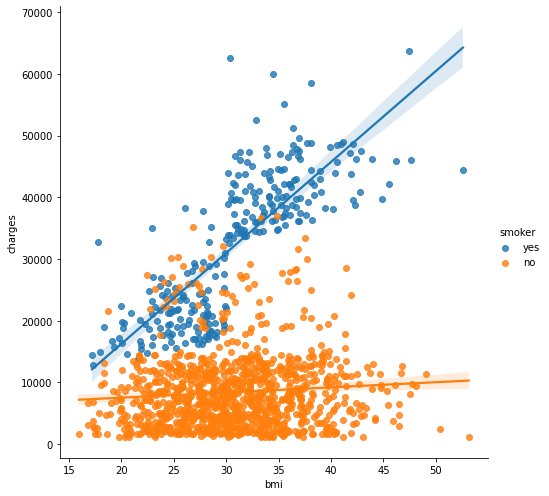

In [9]:
# variation in charges with bmi
plt.figure(figsize=[10,6])
sns.lmplot(data=df, y='charges', x='bmi', hue='smoker', height=7)

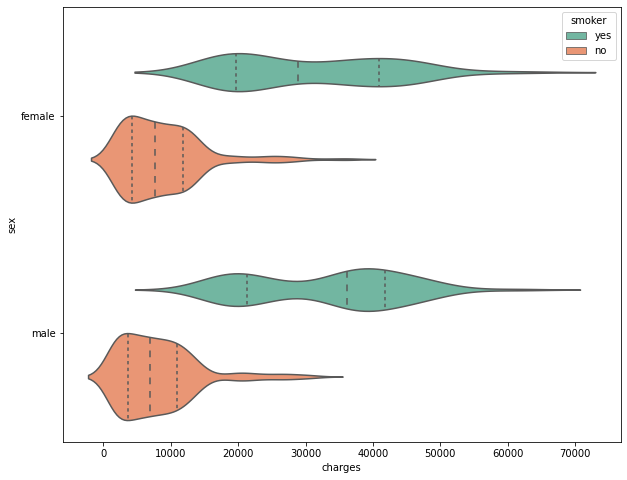

In [10]:
# variation in charges due to sex
plt.figure(figsize=[10,8])
sns.violinplot(data=df, x='charges', y='sex', hue='smoker', inner='quartile', palette='Set2')

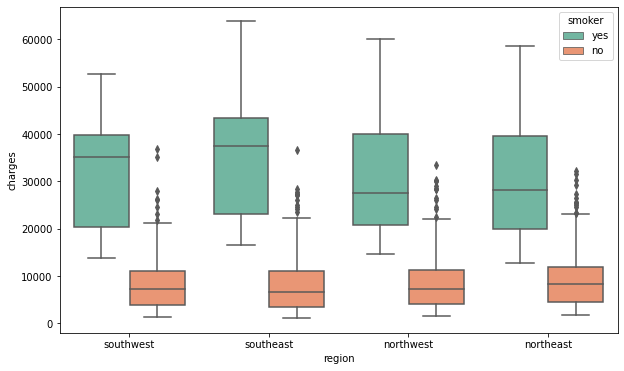

In [11]:
# variation of charges with region
plt.figure(figsize=[10,6])
sns.boxplot(data=df, x='region', y='charges', hue='smoker', palette='Set2')

## **Correlation among features**

In [12]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

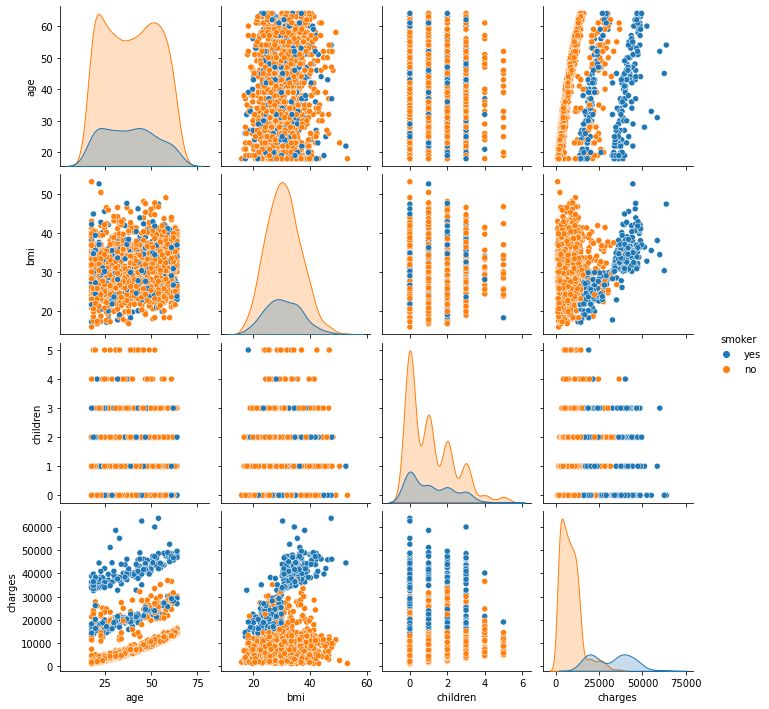

In [13]:
# relation of features with dependent variable
sns.pairplot(df, hue='smoker')

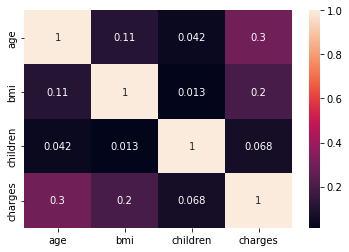

In [14]:
# heatmap to further visualize correlation
sns.heatmap(abs(corr_matrix), annot=True)

# **Step 3. Data Preparation**

In [15]:
# changing smoker column
mapping_smoker = {'yes': 1, 'no': 0}
df['smoking'] = df['smoker'].map(mapping_smoker)

In [16]:
# dropping smoker column
df.drop(['smoker'], axis=1, inplace=True)

In [17]:
# doing the same for sex column
mapping_sex = {'female': 0, 'male': 1}
df['gender'] = df['sex'].map(mapping_sex)
df.drop(['sex'], axis=1, inplace=True)

In [18]:
# making a copy of data
df_1 = df.copy()

In [19]:
# one hot encoding on region column
df = pd.get_dummies(df)

In [20]:
df.head()

,age,bmi,children,charges,smoking,gender,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0


In [21]:
# now checking correlation again
corr_matrix_1 = df.corr()
corr_matrix_1['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
smoking             0.787251
gender              0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

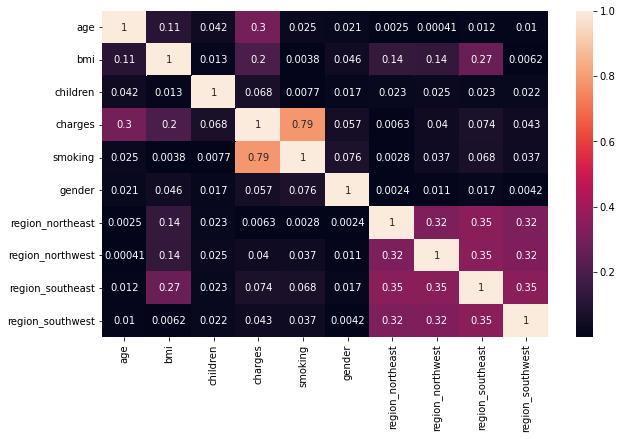

In [22]:
# heatmap to visualize correlation
plt.figure(figsize=[10,6])
sns.heatmap(abs(corr_matrix_1), annot=True)

In [23]:
# checking vif values
